## HELLO, ENTANGLED WORLD!

As an example of how we can work with two qubits in Qiskit, we are going to implement a circuit that prepares an entangled state (a Bell pair)

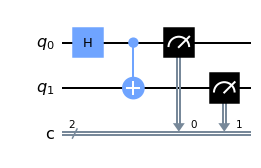

In [1]:
%matplotlib inline

from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *

circ_bell = QuantumCircuit(2,2) # We need two qubits and two classical bits (for the measurements)

circ_bell.h(0) # We apply the H gate on the first qubit
circ_bell.cx(0,1) # We apply the CNOT gate with control on the first qubit and target on the second
circ_bell.measure(range(2),range(2)) # Measurement

circ_bell.draw(output='mpl')

We execute the circuit 1000 times and print the results

In [2]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circ_bell, backend, shots=1000)

counts = job.result().get_counts()

print(counts)

{'00': 511, '11': 489}


Now, we are going to directly access the amplitudes and probabilities of the states. For that, we need to remove the measurement and use the statevector simulator

In [3]:
circ_bell2 = QuantumCircuit(2)
circ_bell2.h(0) 
circ_bell2.cx(0,1) 

backend = Aer.get_backend('statevector_simulator')
job = execute(circ_bell2, backend)

state = job.result().get_statevector()

for i in range(4):
    s = format(i,"b") # Convert to binary
    s = (2-len(s))*"0"+s # Prepend zeroes if needed
    print("Amplitude of",s,"=",state[i])
    
print()

for i in range(4):
    s = format(i,"b") # Convert to binary
    s = (2-len(s))*"0"+s # Prepend zeroes if needed
    print("Probability of",s,"=",abs(state[i])**2)


Amplitude of 00 = (0.7071067811865476+0j)
Amplitude of 01 = 0j
Amplitude of 10 = 0j
Amplitude of 11 = (0.7071067811865475+0j)

Probability of 00 = 0.5000000000000001
Probability of 01 = 0.0
Probability of 10 = 0.0
Probability of 11 = 0.4999999999999999


We are going to run the circuit on an actual computer. To reduce the wait, we would like to execute on the computer with the fewest pending jobs. We can check their properties, after loading our account, with the order *backend_overview()*

In [5]:
provider = IBMQ.load_account()
backend_overview()

ibmqfactory.load_account:WARNING:2020-11-19 10:38:57,937: Credentials are already in use. The existing account in the session will be replaced.


ibmq_santiago                ibmq_athens                  ibmq_armonk
-------------                -----------                  -----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  1
Pending Jobs: 24             Pending Jobs: 5              Pending Jobs: 2
Least busy:   False          Least busy:   False          Least busy:   True
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      139.4          Avg. T1:      85.2           Avg. T1:      178.4
Avg. T2:      99.2           Avg. T2:      80.2           Avg. T2:      193.8



ibmq_valencia                ibmq_ourense                 ibmq_vigo
-------------                ------------                 ---------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 11             Pending Jobs: 6              Pending Jobs: 604
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operat

We can also access more details of a particular computer with the following command

In [6]:
backend_monitor(provider.get_backend("ibmq_ourense"))

ibmq_ourense
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 6
    backend_version: 1.3.0
    basis_gates: ['id', 'u1', 'u2', 'u3', 'cx']
    local: False
    simulator: False
    open_pulse: False
    allow_object_storage: True
    max_experiments: 75
    supported_instructions: ['u1', 'u2', 'u3', 'cx', 'id', 'x', 'measure', 'delay']
    url: None
    dynamic_reprate_enabled: False
    allow_q_object: True
    backend_name: ibmq_ourense
    conditional: False
    credits_required: True
    n_registers: 1
    sample_name: Giraffe
    memory: True
    description: 5 qubit device Ourense
    quantum_volume: 8
    online_date: 2019-07-03 04:00:00+00:00
    coupling_map: [[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]]
    meas_map: [[0, 1, 2, 3, 4]]
    max_shots: 8192

Qubits [Name / Freq / T1 / T2 / U1 err / U2 err / U3 err / Readout err]
-----------------------------------------------------------------------
   

We are going to select the least busy device and run our circuit on it

In [9]:
from qiskit.providers.ibmq import least_busy

# We execute on the least busy device (among the actual quantum computers)
backend = least_busy(provider.backends(operational = True, simulator=False, status_msg='active',
                                       filters=lambda x: x.configuration().n_qubits > 1)) 
print("We are executing on...",backend)
print("It has",backend.status().pending_jobs,"pending jobs")
job_exp = execute(circ_bell, backend=backend)
job_monitor(job_exp)

We are executing on... ibmq_ourense
It has 6 pending jobs
Job Status: job has successfully run


Once that we have run the job, we draw the results and compare them to the one obtained by the simulator

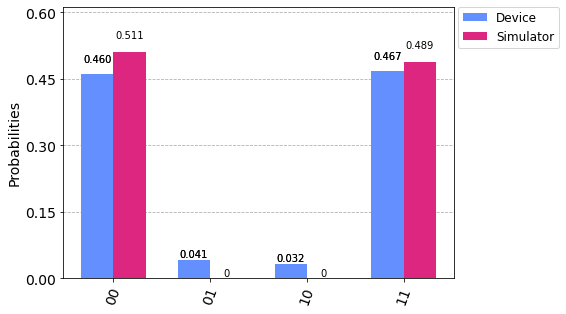

In [10]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ_bell)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])